# Interactive Data Visualization with Bokeh

Chris Myers

Cornell University Center for Advanced Computing (CAC) <br>and <br>
Cornell Department of Physics / Laboratory of Atomic & Solid State Physics (LASSP)

www.cac.cornell.edu/myers

These slides are available (as a jupyter notebook) at: https://github.com/CornellCAC/bokeh-seminar

<img align="left" src="CAC_header.png" alt="CAC logo" width="500"/>

### Outline

* Overview of Bokeh
* Key concepts in Bokeh
* Examples of Bokeh in action
* Bokeh server

### Overview of Bokeh (bokeh.org)

* Package built to support interactive data visualization within web browsers
* Bokeh is not a program, but a library providing an application programming interface (API) to enable programmers to build data visualization environments
* Bokeh library is written in Python
* Communicates with a Javascript-based backend (BokehJS), which works within a browser
* Same architecture supports APIs in other languages (R, Scala, Julia, ...)

![bokeh_bokehjs.png](bokeh_bokehjs.png)

source: https://docs.bokeh.org/en/latest/docs/dev_guide/bokehjs.html

### Overview of Bokeh (continued)

* Supports many standard types of data visualizations
* Also enables interactive exploration of data
    * different views of static data
    * callbacks that respond to user actions to change what data are displayed
* Can be used by individuals to explore data on their local machines, and by larger groups to support webservers that can serve up interactive data visualizations over the internet

![bokeh_bokehjs.png](bokeh_gallery.jpg)

### Comparison with other Python visualization tools

* <b>matplotlib</b> : the workhorse and cornerstone of Python plotting &mdash;<br />makes static figures / images with low-level APIs
    * <b>pandas</b> : generates matplotlib plots from dataframes and series
    * <b>seaborn</b> : generates matplotlib plots tailored to statistical visualizations
    * bokeh does not integrate numerical processing to the extent that matplotlib does (e.g., histograms, contour plots, etc.) &mdash; requires explicit calls to numpy or other packages
* <b>plotly</b> : similar to bokeh, supporting interactive web-based visualization, although with much more support for more complex computations leading to visualizations
* <b>altair</b> : similar to bokeh & plotly, based on the Vega declarative language
* <b>plotnine</b> : Python implementation of the "grammar of graphics" (R/ggplot)
* <b>VTK, ParaView, etc.</b> : better suited for 3D visualization of 3D objects

### Why a presentation about Bokeh?

* Most scientific plotting software that people use is focused on generating static plots for publications, reports, and presentations
* Bokeh is an example of a package that supports a different paradigm:<br /> <i>interactive exploration of data and visualization-guided data analyses</i>
* Bokeh can use interactive visualization to convey additional information about high-dimensional datasets
* Bokeh offers many ways of representing data and developing visualizations, and an overview presentation like this might help you to better decide if and how you might best use Bokeh in your own research

### Installing Bokeh

* Anaconda Python Distribution: installed as part of default distribution along with many other packages

* Conda Environment
    * <tt>conda create -n bokeh_env bokeh &nbsp;&nbsp; # just bokeh + deps</tt>
    * <tt>conda create -n bokeh_env bokeh pandas jupyter networkx &nbsp; # to run this notebook -- and optionally add rise for live slides</tt>
* Python Virtual Environment
    * <tt>python -m venv bokeh_env ; source bokeh_env/bin/activate ; pip install bokeh pandas jupyter networkx</tt>
    
**NOTE**: Bokeh version 3.0 will be released soon &mdash; some aspects of the API or links to examples and documentation might change

### Key concepts in Bokeh

* Plots, Figures, and Glyphs
* Data and ColumnDataSources
* Tools and Annotations
* Interactions and Widgets
* Documents, Layouts, and Applications
* Bokeh server
* BokehJS

See also [Defining key concepts](https://docs.bokeh.org/en/latest/docs/user_guide/concepts.html) in Bokeh User Guide

### Plots, Figures, and Glyphs

Plots are the containers that hold all the relevant objects of a visualization in Bokeh.  They are typically created using the <code>figure()</code> function implemented in the <code>bokeh.plotting</code> module.  

The basic visual building blocks of Bokeh plots are <b>glyphs</b>.

Many different types of glyphs are available for plotting:
* different types of markers: circles, squares, diamonds, etc.
* lines, multi_lines, step lines
* bars, stacked bars
* images
* patches, hex tiles, filled areas, stacked areas


https://docs.bokeh.org/en/latest/docs/gallery.html#standalone-examples

### Examples

#### Simple plot to an html file (figure and glyphs)

In [1]:
from bokeh.plotting import figure, output_file, show

x = [1,2,3,4,5]
y = [2,7,8,4,0]

p = figure(width=400, height=400)
p.circle(x, y, size=10, color="navy", alpha=0.5)
p.line(x, y, color='red')

output_file("simpleplot.html")

show(p)

#### Same plot to a Jupyter notebook cell

In [2]:
from bokeh.plotting import reset_output, figure
reset_output()

from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [3]:
from bokeh.plotting import figure, output_file, show

x = [1,2,3,4,5]
y = [2,7,8,4,0]

p = figure(width=400, height=400)
p.circle(x, y, size=10, color="navy", alpha=0.5)
p.line(x, y, color='red')

show(p)

#### Plotting with data in numpy arrays

In [4]:
from bokeh.plotting import figure, output_file, show
import numpy as np

x = np.linspace(0.,10.,101)
y = np.sin(x) * np.cos(x)**2

p = figure(width=400, height=400)
p.circle(x, y, size=10, color='navy', alpha=1.0)
p.line(x, y, color='red')

show(p)

### Data and ColumnDataSources

Bokeh defines ```ColumnDataSource``` objects to present data to figures for plotting.  Sources can be internally created from other data by Bokeh (e.g., lists or numpy arrays), or explicitly created by the programmer.

A ColumnDataSource is like a Pandas DataFrame, with columns keyed by names, and all columns containing the same number of items.

In [5]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

x = np.linspace(0.,10.,101)
y = np.sin(x) * np.cos(x)**2

source = ColumnDataSource({'x': x, 'y': y})

p = figure(width=400, height=400)
p.circle(x='x', y='y', source=source, size=10, color='green', alpha=0.5)
p.line(x='x', y='y', source=source, color='purple')

show(p)

### ColumnDataSources

ColumnDataSources can be efficiently updated as data change

In [6]:
new_y = np.sin(x) * np.cos(x)**4

source.data['y'] = new_y

#p = figure()
p.circle(x='x', y='y', source=source, size=10, color='green', alpha=0.5)
p.line(x='x', y='y', source=source, color='purple')

show(p)

### ColumnDataSource from a Pandas DataFrame

```
# sample code for creating a dataframe from data in files

import pandas as pd
df = pd.read_csv('a_csv_file.csv')
df = pd.read_excel('an_excel_spreadsheet.xlsx')
```

In [7]:
from bokeh.sampledata.autompg import autompg_clean as df

df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
0,18.0,8,307.0,130,3504,12.0,70,North America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,North America,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,North America,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,North America,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,North America,ford torino,ford


In [8]:
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
0,18.0,8,307.0,130,3504,12.0,70,North America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,North America,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,North America,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,North America,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,North America,ford torino,ford


In [9]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

p = figure()

source = ColumnDataSource(df)

p.circle(x='weight', y='mpg', source=source, size=10, color='green', alpha=0.5)
p.xaxis.axis_label = 'weight'
p.yaxis.axis_label = 'mpg'

show(p)

### Tools

Tools enable you to interact with plots in various ways

* Pan / Drag Tools : Pan, BoxSelect, BoxZoom, LassoSelect
* Click / Tip Tools : Tap (and DoubleTap), PolySelect
* Scroll / Pinch Tools : WheelZoom, Wheel Pan
* Actions : Save, Reset, Undo, Redo, etc.
* Inspectors : Crosshair, Hover
* Edit Tools : BoxEdit, FreehandDraw, PointDraw, PolyDraw, etc.

### Interactive Plotting: Hover

Hovering over a glyph can provide information about the associated data

In [10]:
p = figure(tools='pan,box_zoom,hover,reset', width=600, height=600)

p.circle(x='weight', y='mpg', source=source, size=10, color='green', alpha=0.5)

show(p)

### Configuring what gets displayed while hovering

In [11]:
df.head(2)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
0,18.0,8,307.0,130,3504,12.0,70,North America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,North America,buick skylark 320,buick


In [12]:
p = figure(tools='pan,box_zoom,hover,reset',
           tooltips = [("index", "$index"), ("(x,y)", "($x, $y)"), ('yr', '@yr'), ('name', '@name')],
           width = 400, height = 400)

p.circle(x='weight', y='mpg', source=source, size=10, color='green', alpha=0.5)

show(p)

In [13]:
hover_tips = [(c, "@"+c) for c in source.column_names]

print(hover_tips)

p = figure(tools='pan,box_zoom,hover,reset', tooltips = hover_tips, width=400, height=400)
p.circle(x='weight', y='mpg', source=source, size=10, color='green', alpha=0.5)
show(p)

[('index', '@index'), ('mpg', '@mpg'), ('cyl', '@cyl'), ('displ', '@displ'), ('hp', '@hp'), ('weight', '@weight'), ('accel', '@accel'), ('yr', '@yr'), ('origin', '@origin'), ('name', '@name'), ('mfr', '@mfr')]


### Some hover examples from our Cornell Virtual Workshop (CVW)

cvw.cac.cornell.edu

#### Tweets and Retweets

https://cvw.cac.cornell.edu/pydatasci2/bokeh

https://cvw.cac.cornell.edu/pydatasci2/images/climatechange_tweet_bokeh_scatter_1065274149461987328.html

#### Hitting Statistics in Baseball

https://cvw.cac.cornell.edu/pydatasci2/dimensionality

https://cvw.cac.cornell.edu/pydatasci2/images/batting_TSNE.html

### Interactive Plotting: Brushing

In [14]:
from bokeh.layouts import row
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure

source = ColumnDataSource(df)

hover_tips = [(c, "@"+c) for c in source.column_names]
TOOLS = "box_select,lasso_select,hover,reset,help"

# create a new plot and add a renderer
left = figure(tools=TOOLS, tooltips=hover_tips, width=300, height=300, title=None)
left.circle('weight', 'mpg', source=source)
left.xaxis.axis_label, left.yaxis.axis_label = 'weight', 'mpg'

# create another new plot and add a renderer
right = figure(tools=TOOLS, tooltips=hover_tips, width=300, height=300, title=None)
right.circle('hp', 'accel', source=source)
right.xaxis.axis_label, right.yaxis.axis_label = 'hp', 'accel'

p = row([left, right])

show(p)

### Bokeh server

Bokeh server:

* enables you to modify *what* gets displayed
* enables you to trigger new computations based on user interactions
* the same code can be run locally within a web browser (localhost), or on a webserver that is made accessible on the internet
* can be used to build big data dashboards and applications for allowing users to analyze data

Callback functions:
* code to execute in the server once an action is triggered
* can be used just to modify the display, or to perform computations with the data
* typically written in Python
* if necessary, written in Javascript and called from Python

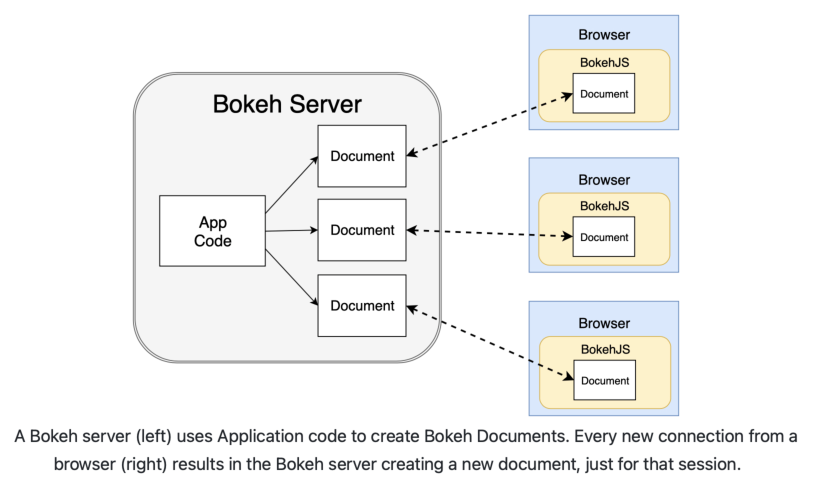

source: https://docs.bokeh.org/en/latest/docs/reference/server.html

User guide: "The primary purpose of the Bokeh server is to synchronize data between the underlying Python environment and the BokehJS library running in the browser."

### Bokeh server example #1

Gallery page: https://docs.bokeh.org/en/latest/docs/gallery.html#server-app-examples

Crossfilter application: https://demo.bokeh.org/crossfilter

Source code at: https://github.com/bokeh/bokeh/tree/branch-3.0/examples/server/app/crossfilter/main.py





### Bokeh server example #1

Running a bokeh server application locally:

bokeh serve --show filename.py

e.g., 

bokeh serve --show crossfilter_mod.py &nbsp;&nbsp;&nbsp;&nbsp; # run this in a terminal with the code in this repo

### Bokeh server & data access

#### Scenarios

(1) Data resides entirely in the server's filesystem or in a database, with processed data served via visualizations

(2) Data resides on user's local machine, to be uploaded to the bokeh server for processing and visualization

(3) Some hybrid of (1)+(2), where user-uploaded data gets added to persistent data store on server



### Bokeh server example #2: data upload

In [15]:
# %load bokehfile.py

"""
bokehfile.py: file input in bokeh
"""

# run in server mode via: bokeh serve --show bokehfile.py
# then click FileInput widget and choose file Scan4.csv

from bokeh.io import curdoc
from bokeh.models.widgets import FileInput
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from base64 import b64decode
import pandas as pd
import io

def upload_data(attr, old, new):
    global datasource, plot
    decoded = b64decode(new)
    data = io.BytesIO(decoded)
    print(data)
    df = pd.read_csv(data, header=None)
    df.columns = ('x', 'y')
    datasource = ColumnDataSource(df)
    plot.line('x', 'y', source=datasource)

datasource = ColumnDataSource({'x': [], 'y': []})
plot = figure(width=500, height=400)

file_input = FileInput(accept=".csv")
file_input.on_change('value', upload_data)

doc=curdoc()
doc.add_root(file_input)
doc.add_root(plot)



### Bokeh server & data access (continued)

(1) Data resides entirely in the server's filesystem or in a database, with processed data served via visualizations (e.g., crossfilter)

(2) Data resides on user's local machine, to be uploaded to the bokeh server for processing and visualization (e.g., bokehfile)
* Data are resident in memory on a server only for the duration of the browser session, and are not stored on disk there
* Any data visualizations or processed datasets in the server application must be downloaded prior to ending the browser session
* Writing code to download processed data involves writing Javascript (a CustomJS callback)

    * https://docs.bokeh.org/en/latest/docs/gallery.html
    * https://demo.bokeh.org/export_csv
    * https://github.com/bokeh/bokeh/tree/branch-3.0/examples/server/app/export_csv

### Bokeh server example #3

#### Denoising ESR Signals Via Wavelets (ACERT / Madhur Srivastava)

https://denoising.cornell.edu

* Accessible only if you are a registered user for the webserver
* And you don't really want to be a registered user unless you have ESR data that you want to analyze

### Conclusions

* Bokeh enables you to create data visualization applications
* Best suited for:
    * Interactive exploration of complex datasets
    * User-guided data analysis and processing
* Different modes:
    * Browser-based interactions for static / standalone visualizations
    * Callbacks for dynamic server-based visualizations
* Part of the Python ecosystem: integrates nicely with other packages
* Questions?

### Appendices

* Changing what gets plotted without Bokeh server (CustomJS)
* Integrating with the larger Python scientific computing ecosystem (bond percolation on a lattice)

### Changing what gets plotted without Bokeh server (CustomJS)

In [16]:
# From the Bokeh Gallery
# https://docs.bokeh.org/en/latest/docs/gallery/slider.html

import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, show

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), width=400, height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (let i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

show(layout)

### Integrating with the larger Python scientific computing ecosystem
#### e.g., bond percolation on a lattice

In [17]:
# bond percolation on a square lattice, using networkx to find connected components
# the bond occupation probability is named p, set here to p=0.5
# change the value of p and rerun to examine how the statistics of percolation clusters change with p

import networkx as nx
import numpy as np
#import itertools
from bokeh.plotting import figure, show
from bokeh.layouts import row
from bokeh.palettes import Category20

def percolate_grid(shape, p, periodic=True):
    g = nx.grid_2d_graph(shape[0], shape[1], periodic=periodic)
    edge_array = np.fromiter(g.edges(), dtype=tuple)
    edges_to_remove = edge_array[np.random.random(g.number_of_edges()) > p]
    g.remove_edges_from(edges_to_remove)
    return g

def compute_components(g):
    cc = list(nx.connected_components(g))
    colors = Category20[20] * ((len(cc)+1)//20)
    sizes = [len(c) for c in cc]
    cc_img = np.zeros(shape, int)
    for i, c in enumerate(cc):
        for n in c:
            cc_img[n] = i
    return cc_img, colors, np.array(sizes)

shape = (500,500)
p = 0.5
g = percolate_grid(shape, p=p)
cc_img, colors, sizes = compute_components(g)

f = figure(frame_width=shape[0], frame_height=shape[1], match_aspect=True, 
           tools = "pan,wheel_zoom,box_zoom,reset")
f.x_range.range_padding = f.y_range.range_padding = 0

f.image(image=[cc_img], x=0, y=0, dw=shape[0], dh=shape[1], palette=colors, level="image")
f.grid.grid_line_width = 0.0

# create another new plot and add a renderer
maxsize = sizes.max()
xsizes = 10**np.linspace(0, int(np.log10(shape[0]*shape[1])), 20)
cdf = [sum(sizes > x) for x in xsizes]
right = figure(width=300, height=300, title=None, x_axis_type="log", y_axis_type="log")
right.line(xsizes, cdf)
right.circle(xsizes, cdf, size=5)
right.xaxis.axis_label = 'size s'
right.yaxis.axis_label = 'P(cluster size > s)'

figs = row([f, right])

show(figs)
